In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [70]:
df = pd.read_csv(r'/home/kudumularajvardhanreddy/Mine/ML/projects/Car Price Prediction - Lasso and Linear Model/car data.csv')

In [71]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [72]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [73]:
df.Fuel_Type.value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [74]:
df.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2},
            'Seller_Type': {'Dealer': 0, 'Individual': 1},
            'Transmission': {'Manual':0, 'Automatic':1}},
             inplace = True)

/tmp/ipykernel_6853/4204962421.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2},


In [75]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [76]:
X = df.drop(['Car_Name', 'Selling_Price'], axis = 1)
Y = df['Selling_Price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [77]:
model = LinearRegression()
model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [78]:
training_data_prediction = model.predict(X_train)
test_data_prediction = model.predict(X_test)

In [79]:
error_score_of_training_data = metrics.r2_score(Y_train, training_data_prediction)
error_score_of_test_data = metrics.r2_score(Y_test, test_data_prediction)

In [80]:
print(error_score_of_training_data)
print(error_score_of_test_data)

0.8838169193709796
0.8401532365377697


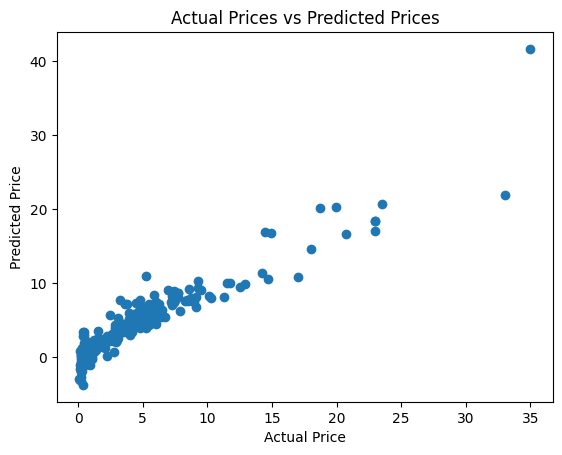

In [81]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

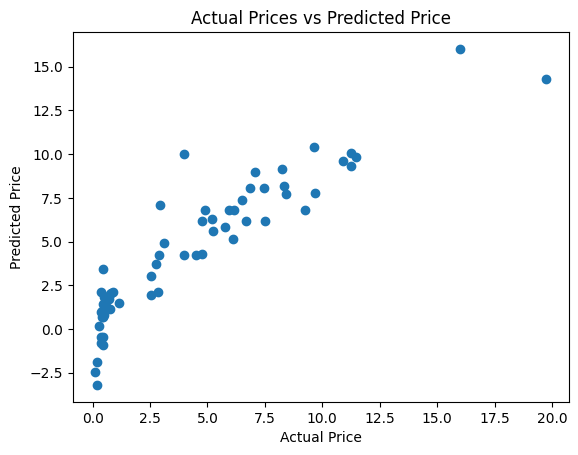

In [82]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Price")
plt.show()

In [83]:
#Prediction with Lasso Regression Model

model_lasso = Lasso()
model_lasso.fit(X_train, Y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [84]:
training_data_prediction_lasso = model_lasso.predict(X_train)
test_data_prediction_lasso = model_lasso.predict(X_test)

In [85]:
error_score_of_training_data_lasso = metrics.r2_score(Y_train, training_data_prediction_lasso)
error_score_of_test_data_lasso = metrics.r2_score(Y_test, test_data_prediction_lasso)

In [86]:
print(error_score_of_training_data_lasso)
print(error_score_of_test_data_lasso)

0.843587395258283
0.8497457570738539


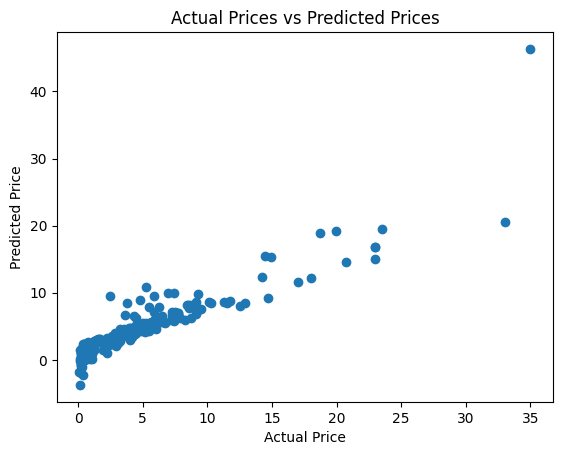

In [87]:
plt.scatter(Y_train, training_data_prediction_lasso)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

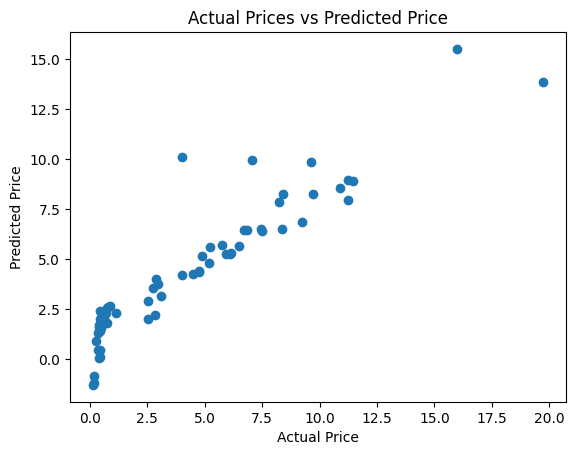

In [88]:
plt.scatter(Y_test, test_data_prediction_lasso)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Price")
plt.show()